In [ ]:
# NOME DOS INTEGRANTES E RESPECTIVOS RM'S: LEONARDO MATHEUS TEIXEIRA - RM556629 | MARCOS VINICIUS PEREIRA DE OLIVEIRA - RM557252 | FELIPE MELO DE SOUSA - RM556099

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
import pickle

In [ ]:
# Fazendo upload do arquivo diretamente
uploaded = files.upload()

# Carregando o dataset
import pandas as pd
data = pd.read_csv(list(uploaded.keys())[0])

Saving World Energy Consumption.csv to World Energy Consumption.csv


In [ ]:
# Exibindo informações gerais do dataset
print("Informações gerais do dataset:")
data.info()

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


In [ ]:
# Visualizando as primeiras linhas do dataset
print("\nPrimeiras linhas do dataéset:")
print(data.head())


Primeiras linhas do dataéset:
         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec

In [ ]:
# Selecionando colunas importantes para a análise
relevant_columns = ['year', 'country', 'renewables_share_energy', 'fossil_share_energy',
                    'carbon_intensity_elec', 'primary_energy_consumption', 'population', 'gdp']

In [ ]:
# Criando um novo dataframe com as colunas relevantes
data_selected = data[relevant_columns]

In [ ]:
# Verificando dados ausentes
print("\nVerificando valores ausentes nas colunas relevantes:")
print(data_selected.isnull().sum())


Verificando valores ausentes nas colunas relevantes:
year                              0
country                           0
renewables_share_energy       17225
fossil_share_energy           17225
carbon_intensity_elec         16847
primary_energy_consumption     9424
population                     3889
gdp                           10899
dtype: int64


In [ ]:
# Limpando os dados (removendo valores ausentes)
data_cleaned = data_selected.dropna()
print(f"\nDados após limpeza: {data_cleaned.shape[0]} linhas restantes.")


Dados após limpeza: 1283 linhas restantes.


In [ ]:
#Após limpeza, restaram o total de 1283 linhas

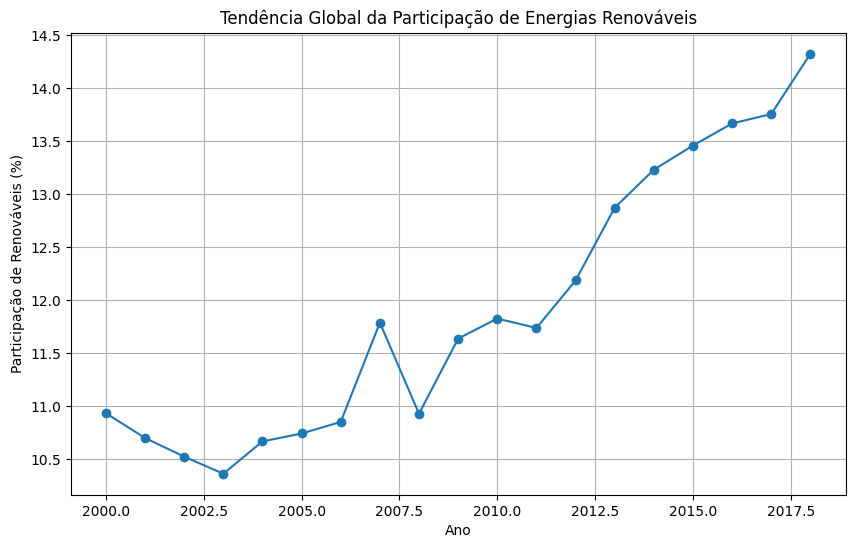

In [ ]:
# Calculando a média global da participação de energias renováveis por ano
renewables_trend = data_cleaned.groupby('year')['renewables_share_energy'].mean()

# Visualizando a tendência
plt.figure(figsize=(10, 6))
plt.plot(renewables_trend.index, renewables_trend.values, marker='o')
plt.title('Tendência Global da Participação de Energias Renováveis')
plt.xlabel('Ano')
plt.ylabel('Participação de Renováveis (%)')
plt.grid(True)
plt.show()

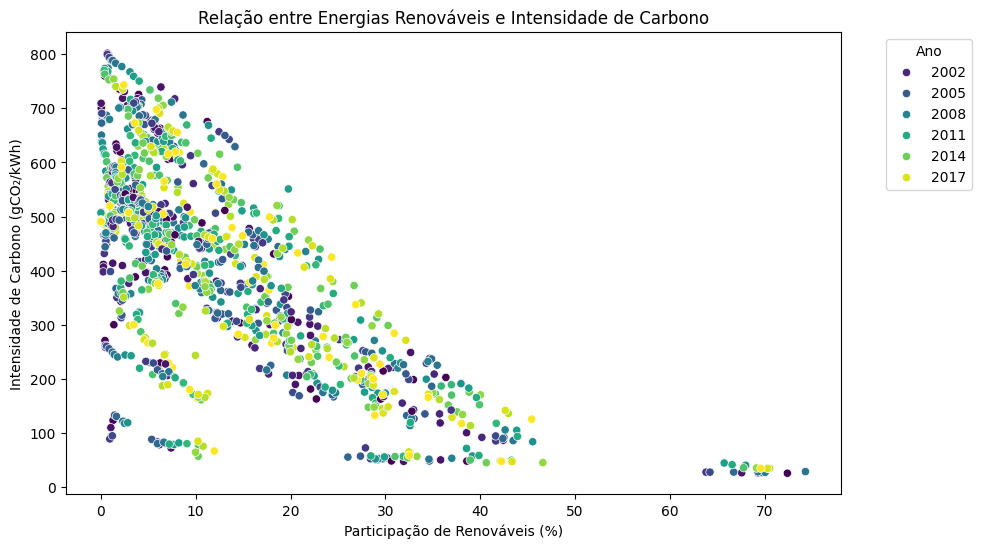

In [ ]:
# Relação entre participação de renováveis e intensidade de carbono
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='renewables_share_energy', y='carbon_intensity_elec', hue='year', palette='viridis')
plt.title('Relação entre Energias Renováveis e Intensidade de Carbono')
plt.xlabel('Participação de Renováveis (%)')
plt.ylabel('Intensidade de Carbono (gCO₂/kWh)')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

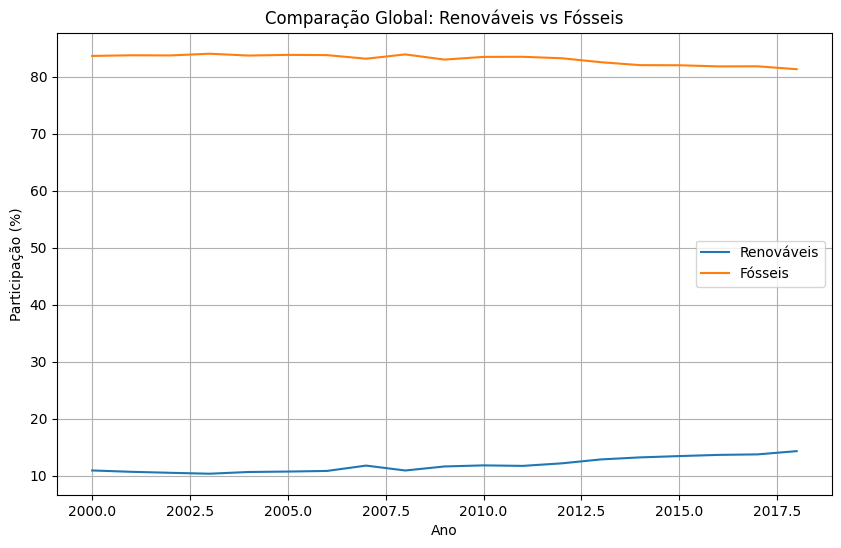

In [ ]:
# Comparação global de fontes renováveis e fósseis
fossil_vs_renewables = data_cleaned.groupby('year')[['renewables_share_energy', 'fossil_share_energy']].mean()

# Visualizando os dados
fossil_vs_renewables.plot(figsize=(10, 6))
plt.title('Comparação Global: Renováveis vs Fósseis')
plt.xlabel('Ano')
plt.ylabel('Participação (%)')
plt.legend(['Renováveis', 'Fósseis'])
plt.grid(True)
plt.show()

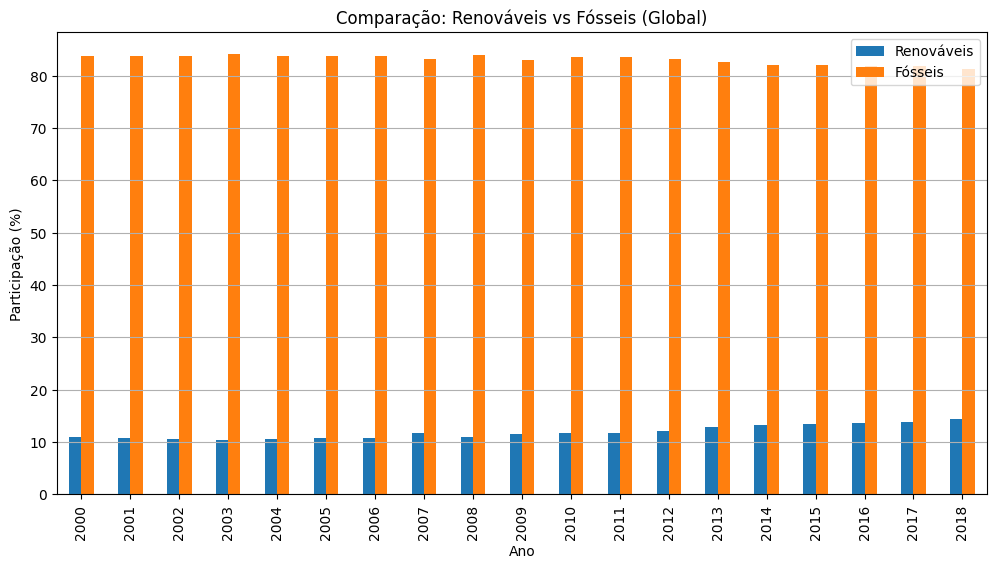

In [ ]:
# Comparação global de fontes renováveis e fósseis
fossil_vs_renewables = data_cleaned.groupby('year')[['renewables_share_energy', 'fossil_share_energy']].mean()

# Criando o gráfico de barras
fossil_vs_renewables.plot(kind='bar', figsize=(12, 6))
plt.title('Comparação: Renováveis vs Fósseis (Global)')
plt.xlabel('Ano')
plt.ylabel('Participação (%)')
plt.legend(['Renováveis', 'Fósseis'])
plt.grid(axis='y')
plt.show()

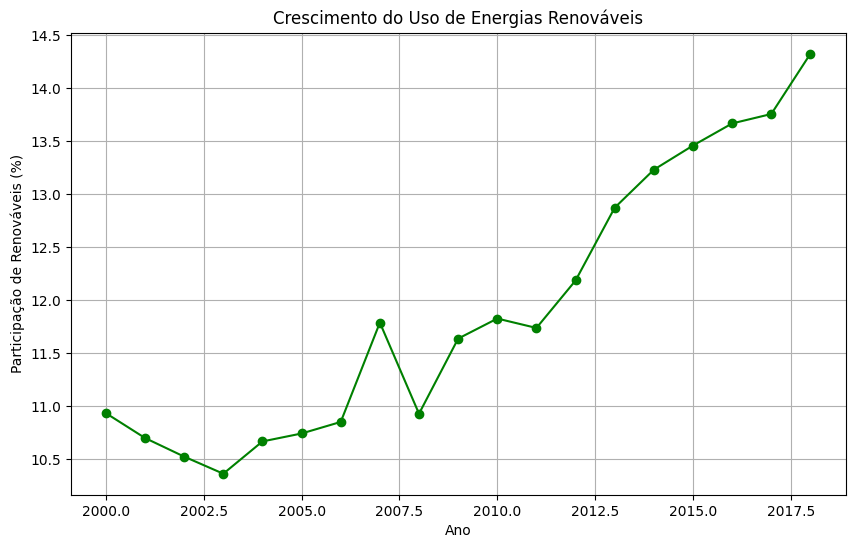

In [ ]:
# Tendência do uso de energias renováveis
plt.figure(figsize=(10, 6))
plt.plot(fossil_vs_renewables.index, fossil_vs_renewables['renewables_share_energy'], marker='o', color='green')
plt.title('Crescimento do Uso de Energias Renováveis')
plt.xlabel('Ano')
plt.ylabel('Participação de Renováveis (%)')
plt.grid(True)
plt.show()

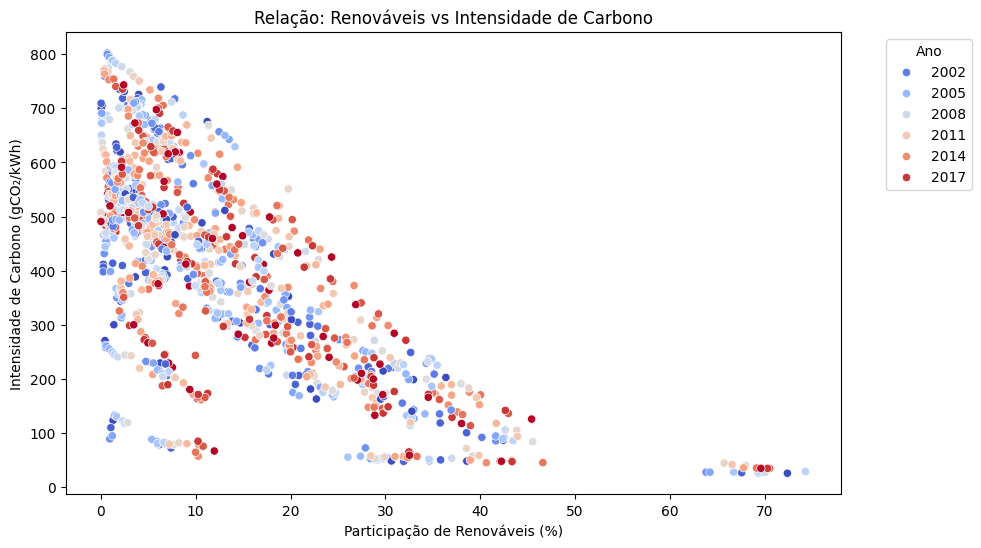

In [ ]:
# Relação entre participação de renováveis e intensidade de carbono
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='renewables_share_energy', y='carbon_intensity_elec', hue='year', palette='coolwarm')
plt.title('Relação: Renováveis vs Intensidade de Carbono')
plt.xlabel('Participação de Renováveis (%)')
plt.ylabel('Intensidade de Carbono (gCO₂/kWh)')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# # Verificar os dados para o ano de 2020
# print("Dados para o ano de 2020:")
# print(year_data[sources].describe())

# print("\nValores nulos nas colunas selecionadas:")
# print(year_data[sources].isnull().sum())

In [ ]:
# Verificar quais anos possuem dados válidos para essas colunas
valid_years = data_cleaned[['year', 'renewables_share_energy', 'fossil_share_energy']].dropna()
print("Anos disponíveis com dados válidos:")
print(valid_years['year'].unique())

Anos disponíveis com dados válidos:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]


In [ ]:
# # Escolher outro ano (exemplo: 2018)
# year_data = data_cleaned[data_cleaned['year'] == 2018]

# # Recalcular os valores
# values = year_data[sources].mean()

# # Criar o gráfico de pizza
# plt.figure(figsize=(8, 8))
# plt.pie(values, labels=['Renováveis', 'Fósseis'], autopct='%1.1f%%', startangle=140, colors=['green', 'gray'])
# plt.title('Distribuição das Fontes de Energia (2019)')
# plt.show()

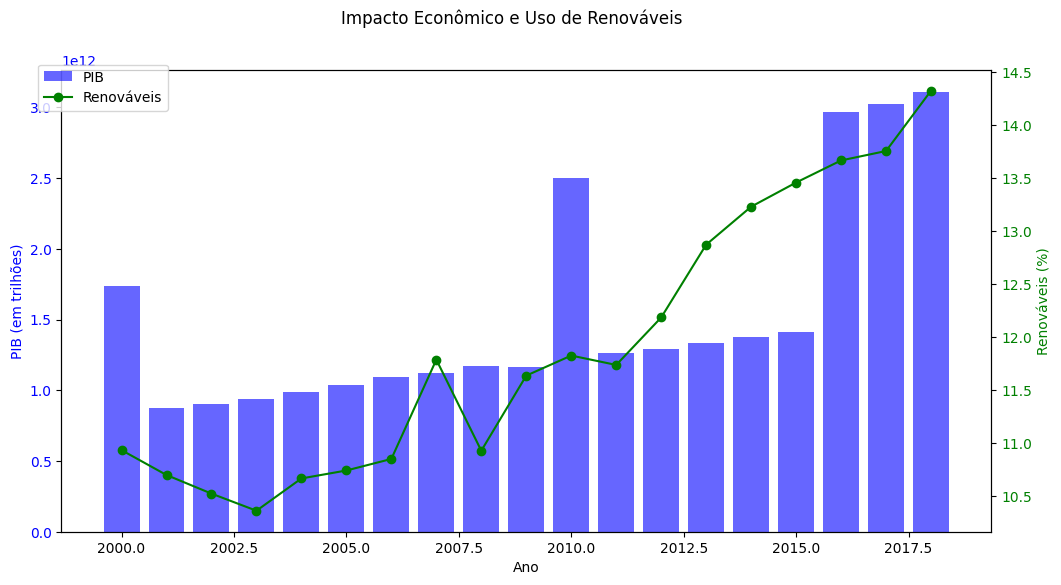

In [ ]:
# PIB vs Renováveis
economic_data = data_cleaned.groupby('year')[['gdp', 'renewables_share_energy']].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para o PIB
ax1.bar(economic_data.index, economic_data['gdp'], color='blue', alpha=0.6, label='PIB')
ax1.set_ylabel('PIB (em trilhões)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Ano')

# Linha para renováveis
ax2 = ax1.twinx()
ax2.plot(economic_data.index, economic_data['renewables_share_energy'], color='green', marker='o', label='Renováveis')
ax2.set_ylabel('Renováveis (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e legendas
fig.suptitle('Impacto Econômico e Uso de Renováveis')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(axis='x')
plt.show()

Coeficiente de Determinação (R²): 0.49922740548165845
Erro Médio Absoluto (MAE): 122.97454291500449


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


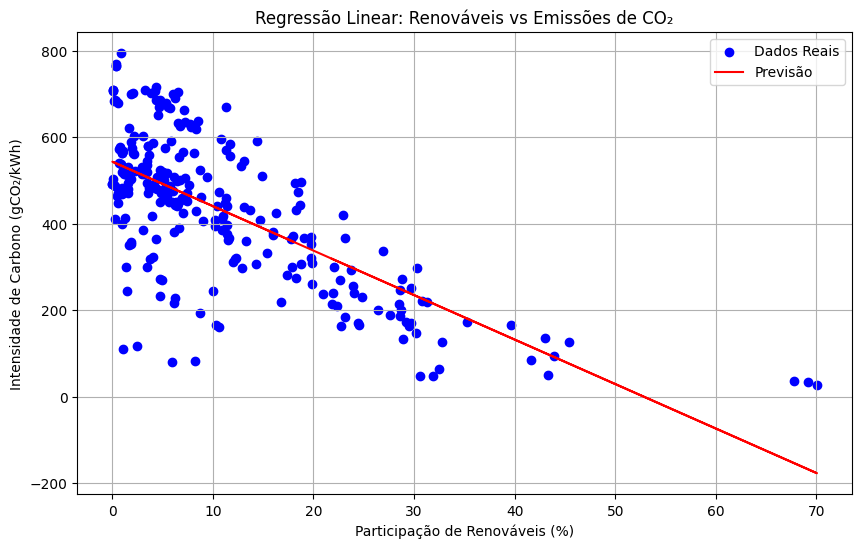

In [ ]:
# Selecionando as variáveis
features = data_cleaned[['renewables_share_energy']].dropna()
target = data_cleaned['carbon_intensity_elec'].dropna()

# Garantindo que os índices sejam compatíveis
data_for_model = pd.concat([features, target], axis=1).dropna()

# Dividindo em treino e teste
X = data_for_model[['renewables_share_energy']]
y = data_for_model['carbon_intensity_elec']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando o modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões e avaliação
y_pred = model.predict(X_test)
print("Coeficiente de Determinação (R²):", r2_score(y_test, y_pred))
print("Erro Médio Absoluto (MAE):", mean_squared_error(y_test, y_pred, squared=False))

# Gráfico do modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados Reais')
plt.plot(X_test, y_pred, color='red', label='Previsão')
plt.title('Regressão Linear: Renováveis vs Emissões de CO₂')
plt.xlabel('Participação de Renováveis (%)')
plt.ylabel('Intensidade de Carbono (gCO₂/kWh)')
plt.legend()
plt.grid()
plt.show()

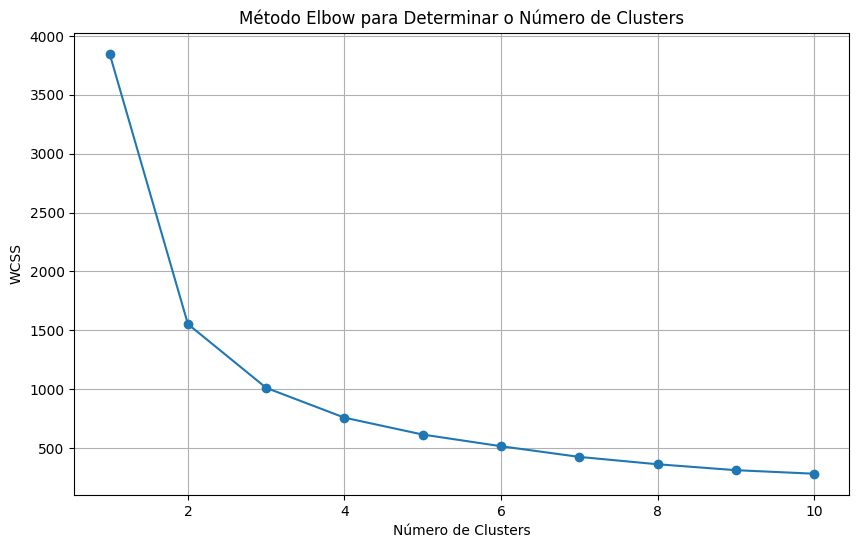

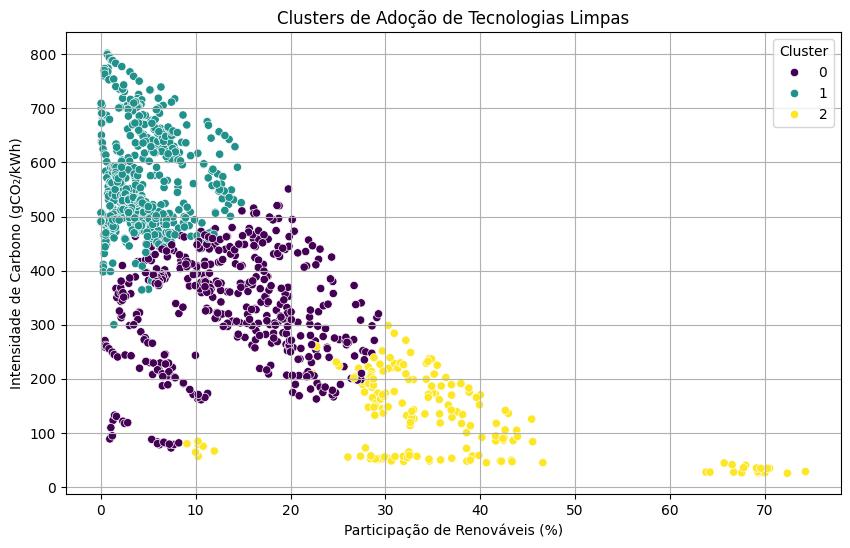

In [ ]:
# Selecionando variáveis relevantes
cluster_data = data_cleaned[['renewables_share_energy', 'fossil_share_energy', 'carbon_intensity_elec']].dropna()

# Padronizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determinando o número ideal de clusters (método Elbow)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Aplicando o K-Means com o número ideal de clusters (exemplo: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_data['Cluster'] = cluster_labels

# Visualizando os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_data, x='renewables_share_energy', y='carbon_intensity_elec', hue='Cluster', palette='viridis')
plt.title('Clusters de Adoção de Tecnologias Limpas')
plt.xlabel('Participação de Renováveis (%)')
plt.ylabel('Intensidade de Carbono (gCO₂/kWh)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [ ]:
# Verificando os coeficientes do modelo
print("Coeficiente (Impacto das Renováveis):", model.coef_[0])
print("Intercepto:", model.intercept_)

Coeficiente (Impacto das Renováveis): -10.275825408009128
Intercepto: 543.275623732642


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculando métricas adicionais
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Erro Médio Absoluto (MAE):", mae)
print("Erro Médio Quadrático (MSE):", mse)
print("Raiz do Erro Médio Quadrático (RMSE):", rmse)

Erro Médio Absoluto (MAE): 91.61059661769801
Erro Médio Quadrático (MSE): 15122.738205154283
Raiz do Erro Médio Quadrático (RMSE): 122.97454291500449


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


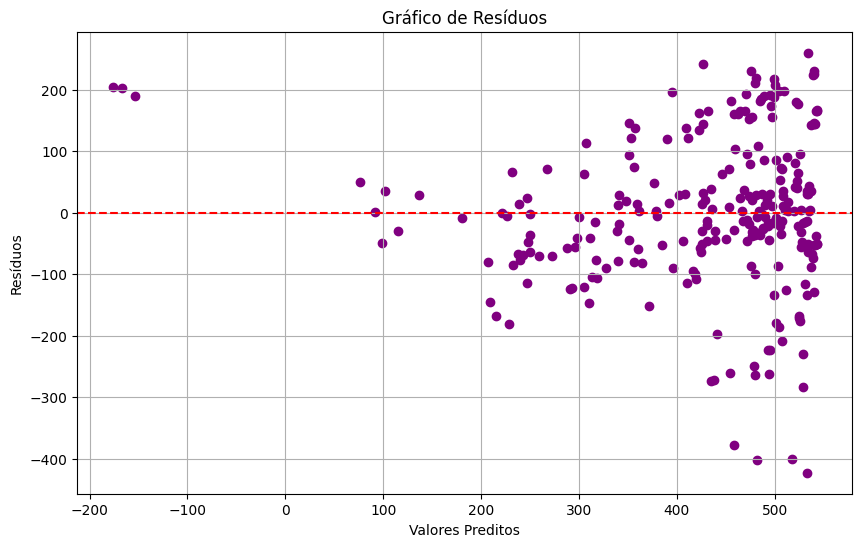

In [ ]:
# Calculando os resíduos
residuos = y_test - y_pred

# Plotando os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.grid()
plt.show()

In [ ]:
# Contando o número de países em cada cluster
print(cluster_data['Cluster'].value_counts())

Cluster
1    633
0    472
2    178
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score

# Calculando o Silhouette Score
silhouette = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.44917446335542105


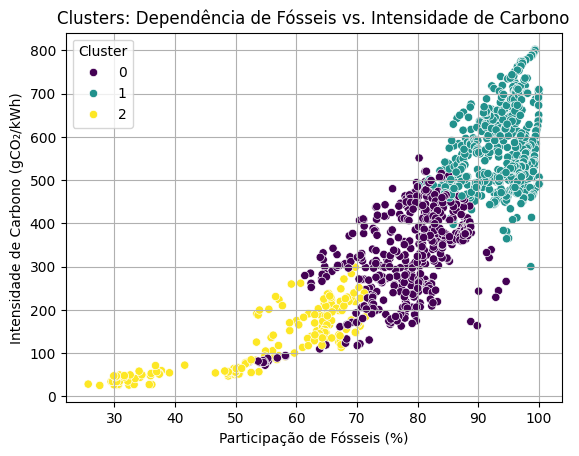

In [ ]:
# Visualizando clusters com outras combinações de variáveis
sns.scatterplot(data=cluster_data, x='fossil_share_energy', y='carbon_intensity_elec', hue='Cluster', palette='viridis')
plt.title('Clusters: Dependência de Fósseis vs. Intensidade de Carbono')
plt.xlabel('Participação de Fósseis (%)')
plt.ylabel('Intensidade de Carbono (gCO₂/kWh)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [ ]:
# Estatísticas resumidas por cluster
cluster_summary = cluster_data.groupby('Cluster').mean()
print("Resumo dos Clusters:")
print(cluster_summary)

Resumo dos Clusters:
         renewables_share_energy  fossil_share_energy  carbon_intensity_elec
Cluster                                                                     
0                      13.299451            78.649447             331.495011
1                       3.958384            94.256033             569.213954
2                      36.639230            55.072365             128.561247


In [ ]:
# Salvando o modelo de regressão
with open('regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Salvando o modelo de clusterização
with open('cluster_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Salvando o scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)